In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('cleaned_customer_segmentation.csv')
print("\nFirst 10 rows with all columns:")
print(df.head(10))


First 10 rows with all columns:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  2012-09-04       58     

VISUALISATION ON THE ORIGINAL DATA


SCATTER PLOTS


The scatterplots below show relationship between the different columns within the csv and the income column.It is generally used to plot the relationship between one independent variable and one dependent variable, where an independent variable is plotted on the x-axis and a dependent variable is plotted on the y-axis so that you can visualize the effect of the independent variable on the dependent variable.In the above case, income is the dependent variable and the other columns are independent

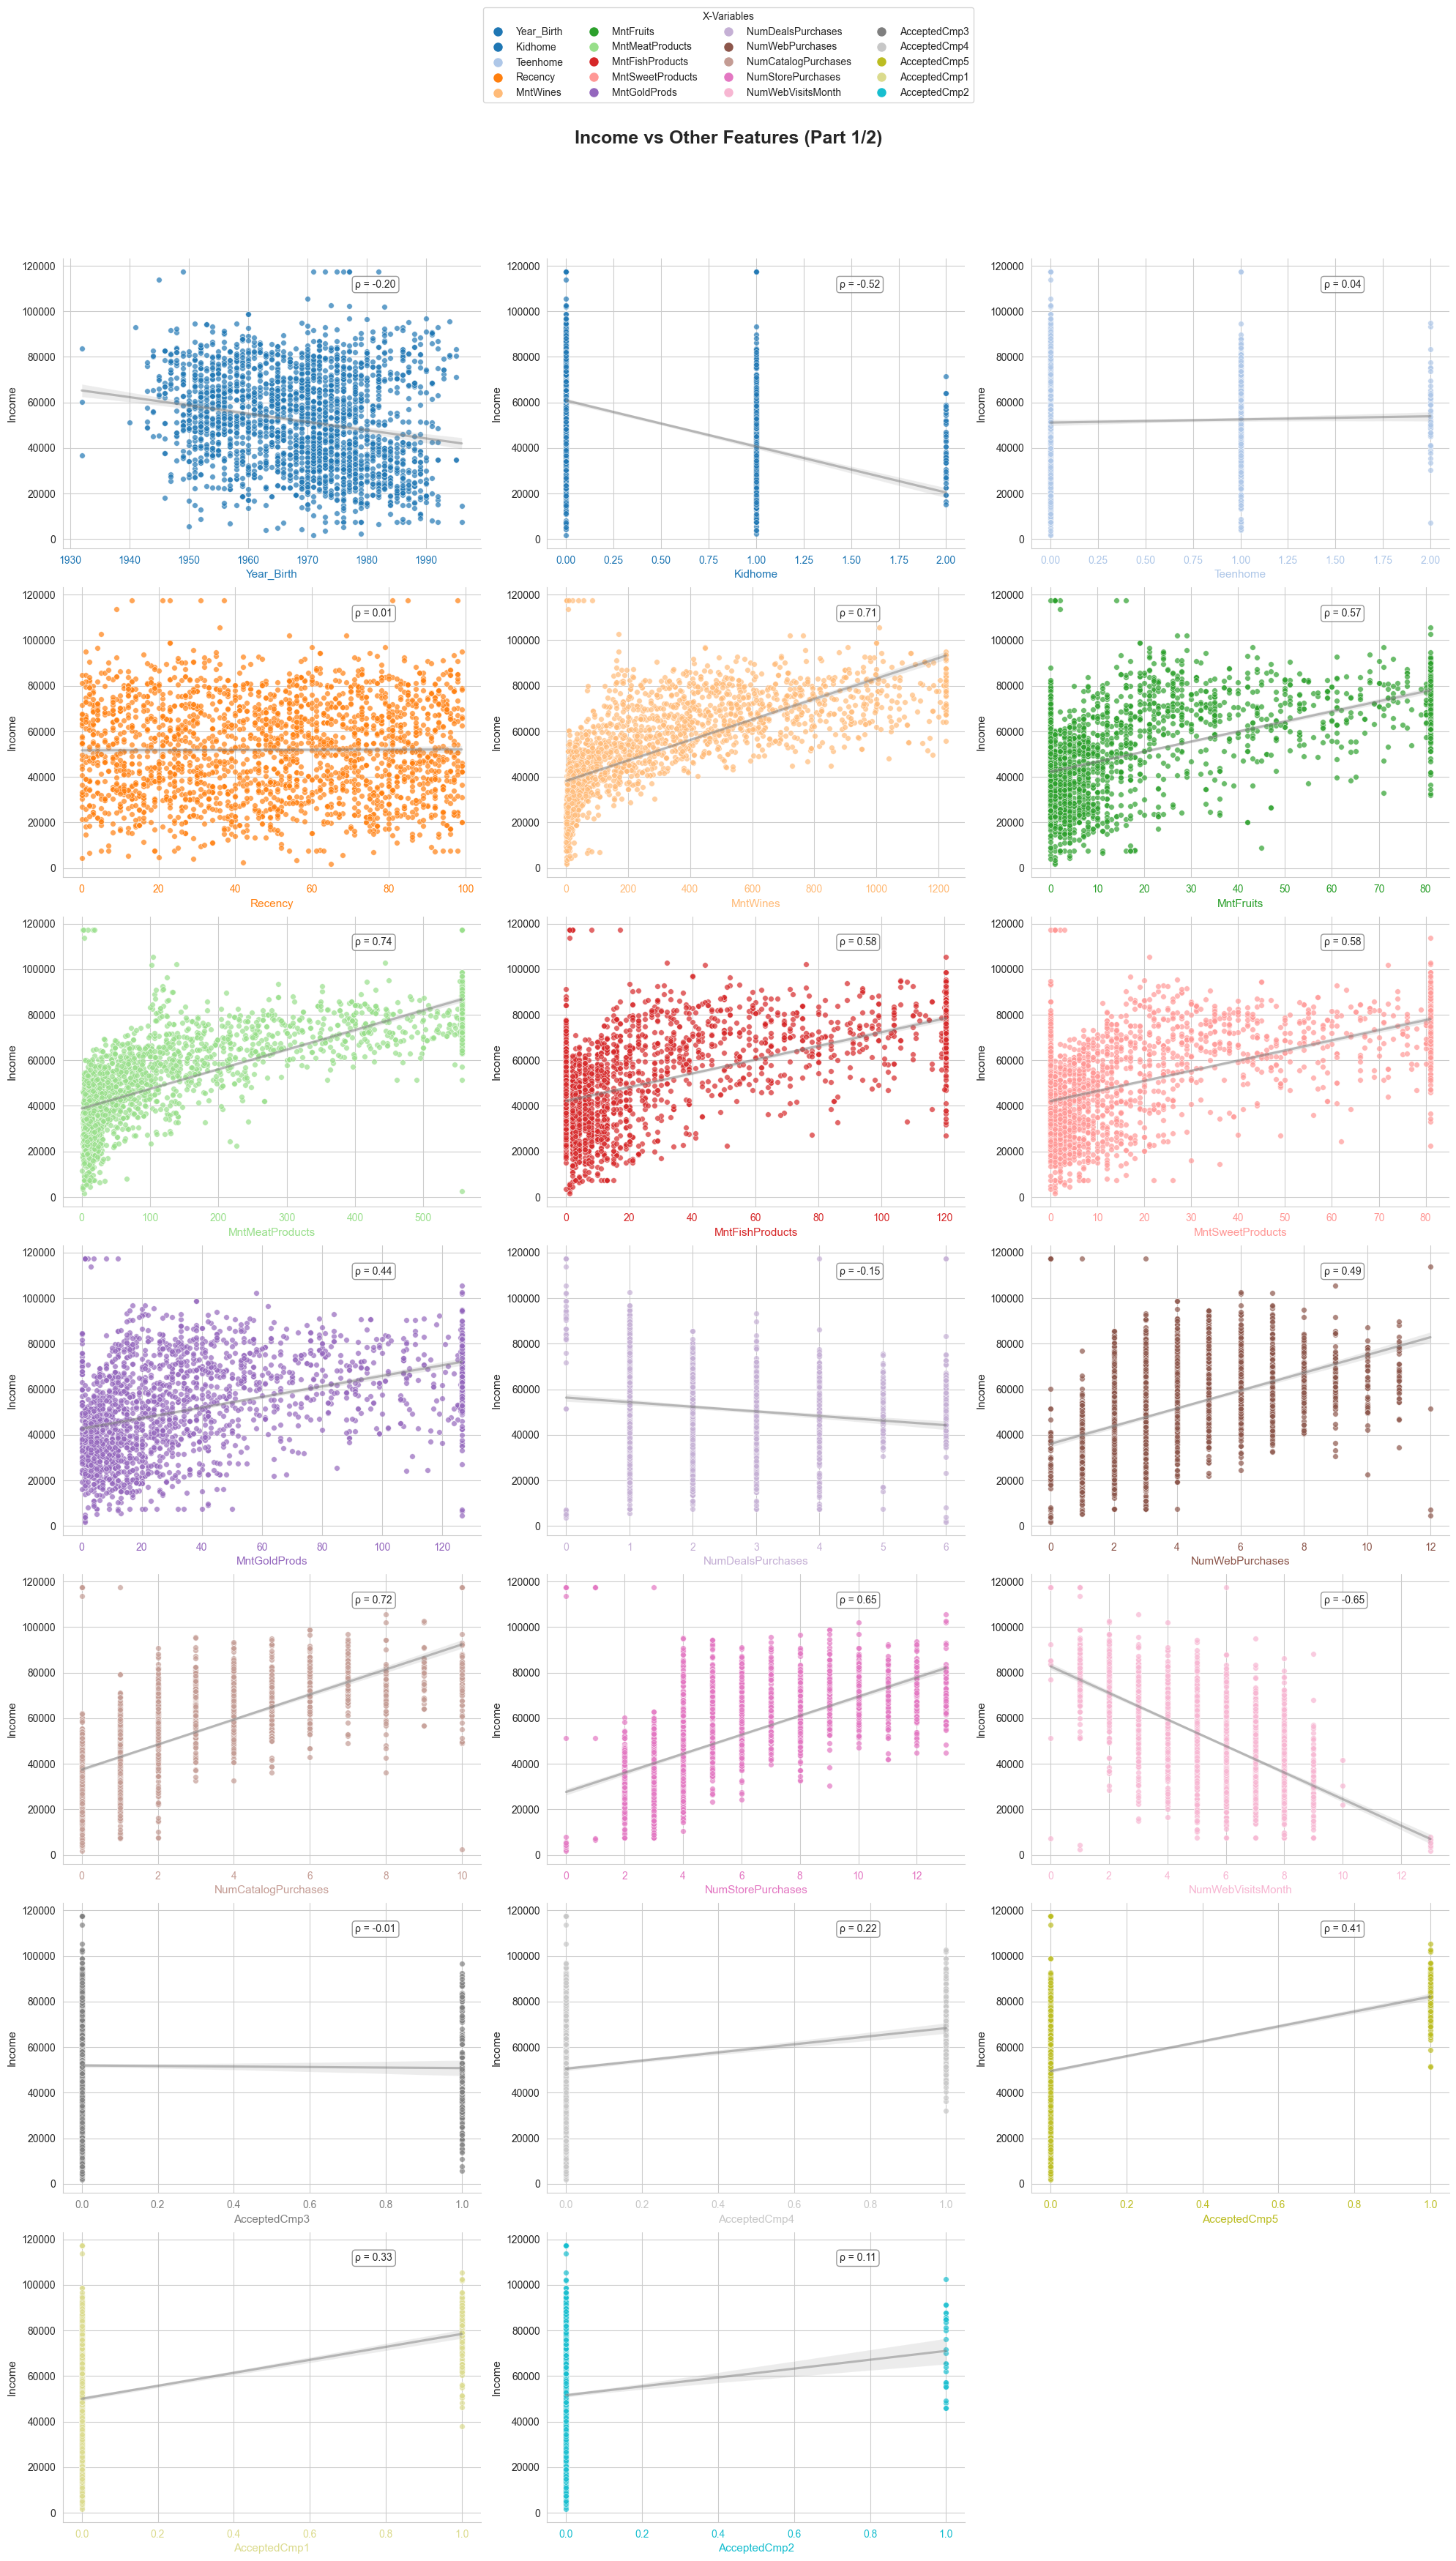

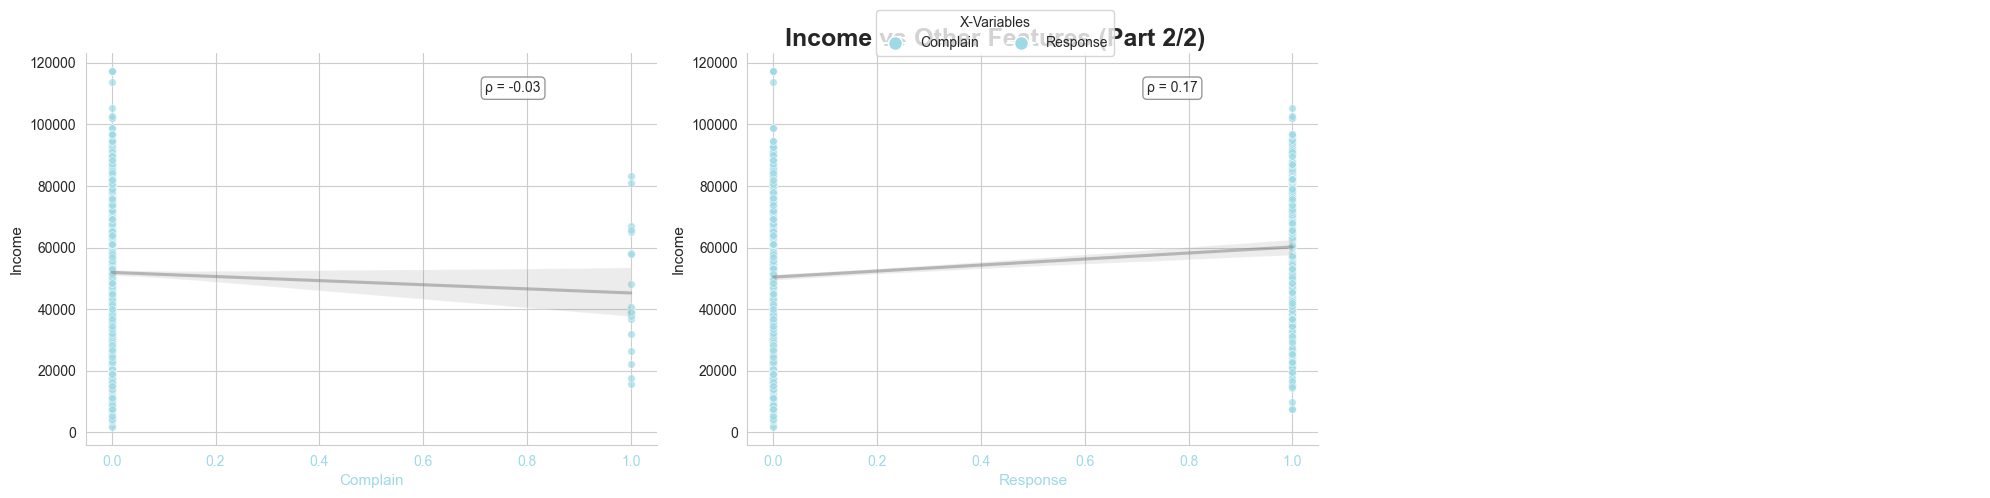

In [12]:
# Select numeric columns excluding 'ID'
if 'ID' in df.columns:
    num_cols = df.drop('ID', axis=1).select_dtypes(include='number').columns.tolist()
else:
    num_cols = df.select_dtypes(include='number').columns.tolist()

# Ensure 'Income' is in the dataset and numeric
if 'Income' not in num_cols:
    # Try to find similar column names
    income_cols = [col for col in df.columns if 'income' in col.lower()]
    if income_cols:
        income_col = income_cols[0]
    else:
        raise ValueError("No 'Income' column found in the dataset")
else:
    income_col = 'Income'

# Create list of x-variables (all numeric columns except Income)
x_vars = [col for col in num_cols if col != income_col]

# Create a unique color map for x-axis variables
color_map = dict(zip(x_vars, cm.tab20(np.linspace(0, 1, len(x_vars)))))

# Configuration
PLOTS_PER_ROW = 3
PLOTS_PER_FIGURE = min(20, len(x_vars))  # Max 20 plots per figure

# Calculate number of figures needed
num_figures = math.ceil(len(x_vars) / PLOTS_PER_FIGURE)

for fig_idx in range(num_figures):
    # Create a new figure for each batch
    start_idx = fig_idx * PLOTS_PER_FIGURE
    end_idx = min((fig_idx + 1) * PLOTS_PER_FIGURE, len(x_vars))
    num_plots = end_idx - start_idx
    
    # Calculate rows needed (4 plots per row)
    rows = math.ceil(num_plots / PLOTS_PER_ROW)
    
    fig, axes = plt.subplots(rows, PLOTS_PER_ROW, 
                             figsize=(20, 5 * rows),
                             squeeze=False)
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    
    # Flatten axes for easy iteration
    axes_flat = axes.flatten()
    
    # Plot each x-variable against Income
    for idx in range(num_plots):
        x_col = x_vars[start_idx + idx]
        ax = axes_flat[idx]
        
        # Get unique color for this x-axis variable
        color = color_map[x_col]
        
        # Create scatter plot with x-variable specific color
        sns.scatterplot(data=df, x=x_col, y=income_col, ax=ax, 
                        s=30, alpha=0.7, color=color)
        
        # Add correlation coefficient
        corr = df[[x_col, income_col]].corr().iloc[0, 1]
        ax.annotate(f'ρ = {corr:.2f}', xy=(0.7, 0.9), 
                     xycoords='axes fraction', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        
        # Set labels with x-axis label in its color
        ax.set_xlabel(x_col, fontsize=11, color=color)
        ax.set_ylabel(income_col, fontsize=11)
        
        # Color x-axis tick labels to match
        ax.tick_params(axis='x', colors=color)
        
        # Add trendline
        sns.regplot(data=df, x=x_col, y=income_col, ax=ax, 
                    scatter=False, color='gray', line_kws={'alpha': 0.5})
        
        # Remove top/right spines
        sns.despine(ax=ax)
    
    # Hide any unused axes
    for idx in range(num_plots, len(axes_flat)):
        axes_flat[idx].axis('off')
    
    # Create legend for x-variables in this figure
    x_vars_in_fig = x_vars[start_idx:end_idx]
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  markerfacecolor=color_map[var], markersize=10,
                                  label=var)
                      for var in x_vars_in_fig]
    
    # Place legend at top center
    fig.legend(handles=legend_elements, 
               loc='upper center', 
               ncol=min(4, len(x_vars_in_fig)),
               bbox_to_anchor=(0.5, 1.0), 
               fontsize=10,
               frameon=True,
               title="X-Variables")
    
    # Add main title
    fig.suptitle(f'Income vs Other Features (Part {fig_idx+1}/{num_figures})', 
                 fontsize=18, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  
    plt.show()

SCATTER PLOTS FOR THE CATEGORICAL COLUMNS

The scatter plots below show the distribution of income across the columns(Education and Marital_Status) using mean.

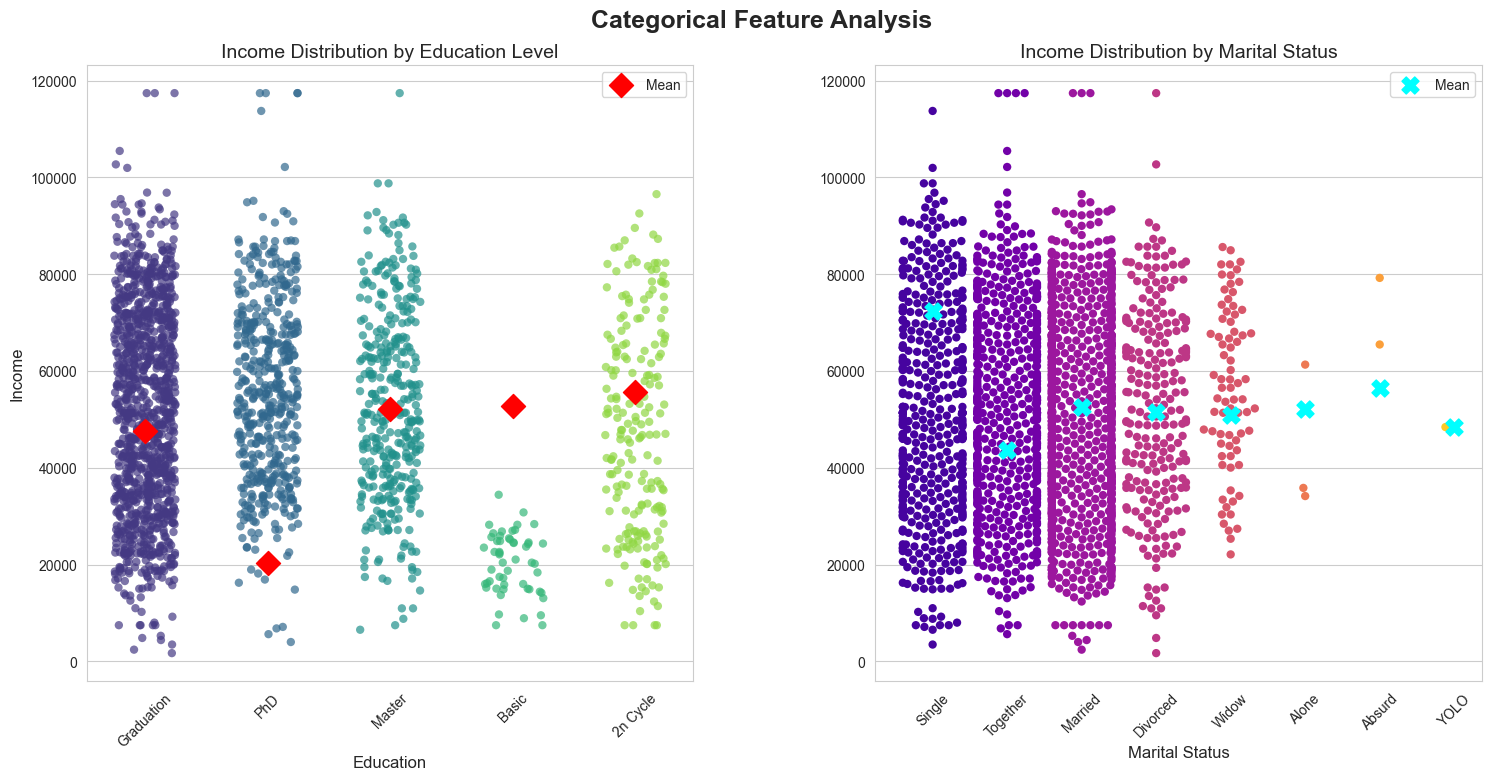

In [13]:


df = pd.read_csv('cleaned_customer_segmentation.csv')

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
plt.subplots_adjust(wspace=0.3)

#  Plot for Education vs Income
ax1 = axes[0]
sns.stripplot(
    data=df, 
    x='Education', 
    y='Income', 
    ax=ax1,
    jitter=0.25,
    palette='viridis',
    alpha=0.7,
    size=6
)

# Add mean markers
education_means = df.groupby('Education')['Income'].mean()
for i, level in enumerate(education_means.index):
    ax1.scatter(i, education_means[level], color='red', s=150, 
                marker='D', zorder=5, label='Mean' if i==0 else "")
    
ax1.set_title('Income Distribution by Education Level', fontsize=14)
ax1.set_xlabel('Education', fontsize=12)
ax1.set_ylabel('Income', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

#  Plot for Marital Status vs Income
ax2 = axes[1]
sns.swarmplot(
    data=df, 
    x='Marital_Status', 
    y='Income', 
    ax=ax2,
    palette='plasma',
    size=6
)

# Add mean markers
status_means = df.groupby('Marital_Status')['Income'].mean()
for i, status in enumerate(status_means.index):
    ax2.scatter(i, status_means[status], color='cyan', s=150, 
                marker='X', zorder=5, label='Mean' if i==0 else "")
    
ax2.set_title('Income Distribution by Marital Status', fontsize=14)
ax2.set_xlabel('Marital Status', fontsize=12)
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# Add overall title
fig.suptitle('Categorical Feature Analysis', fontsize=18, fontweight='bold', y=0.95)
plt.show()

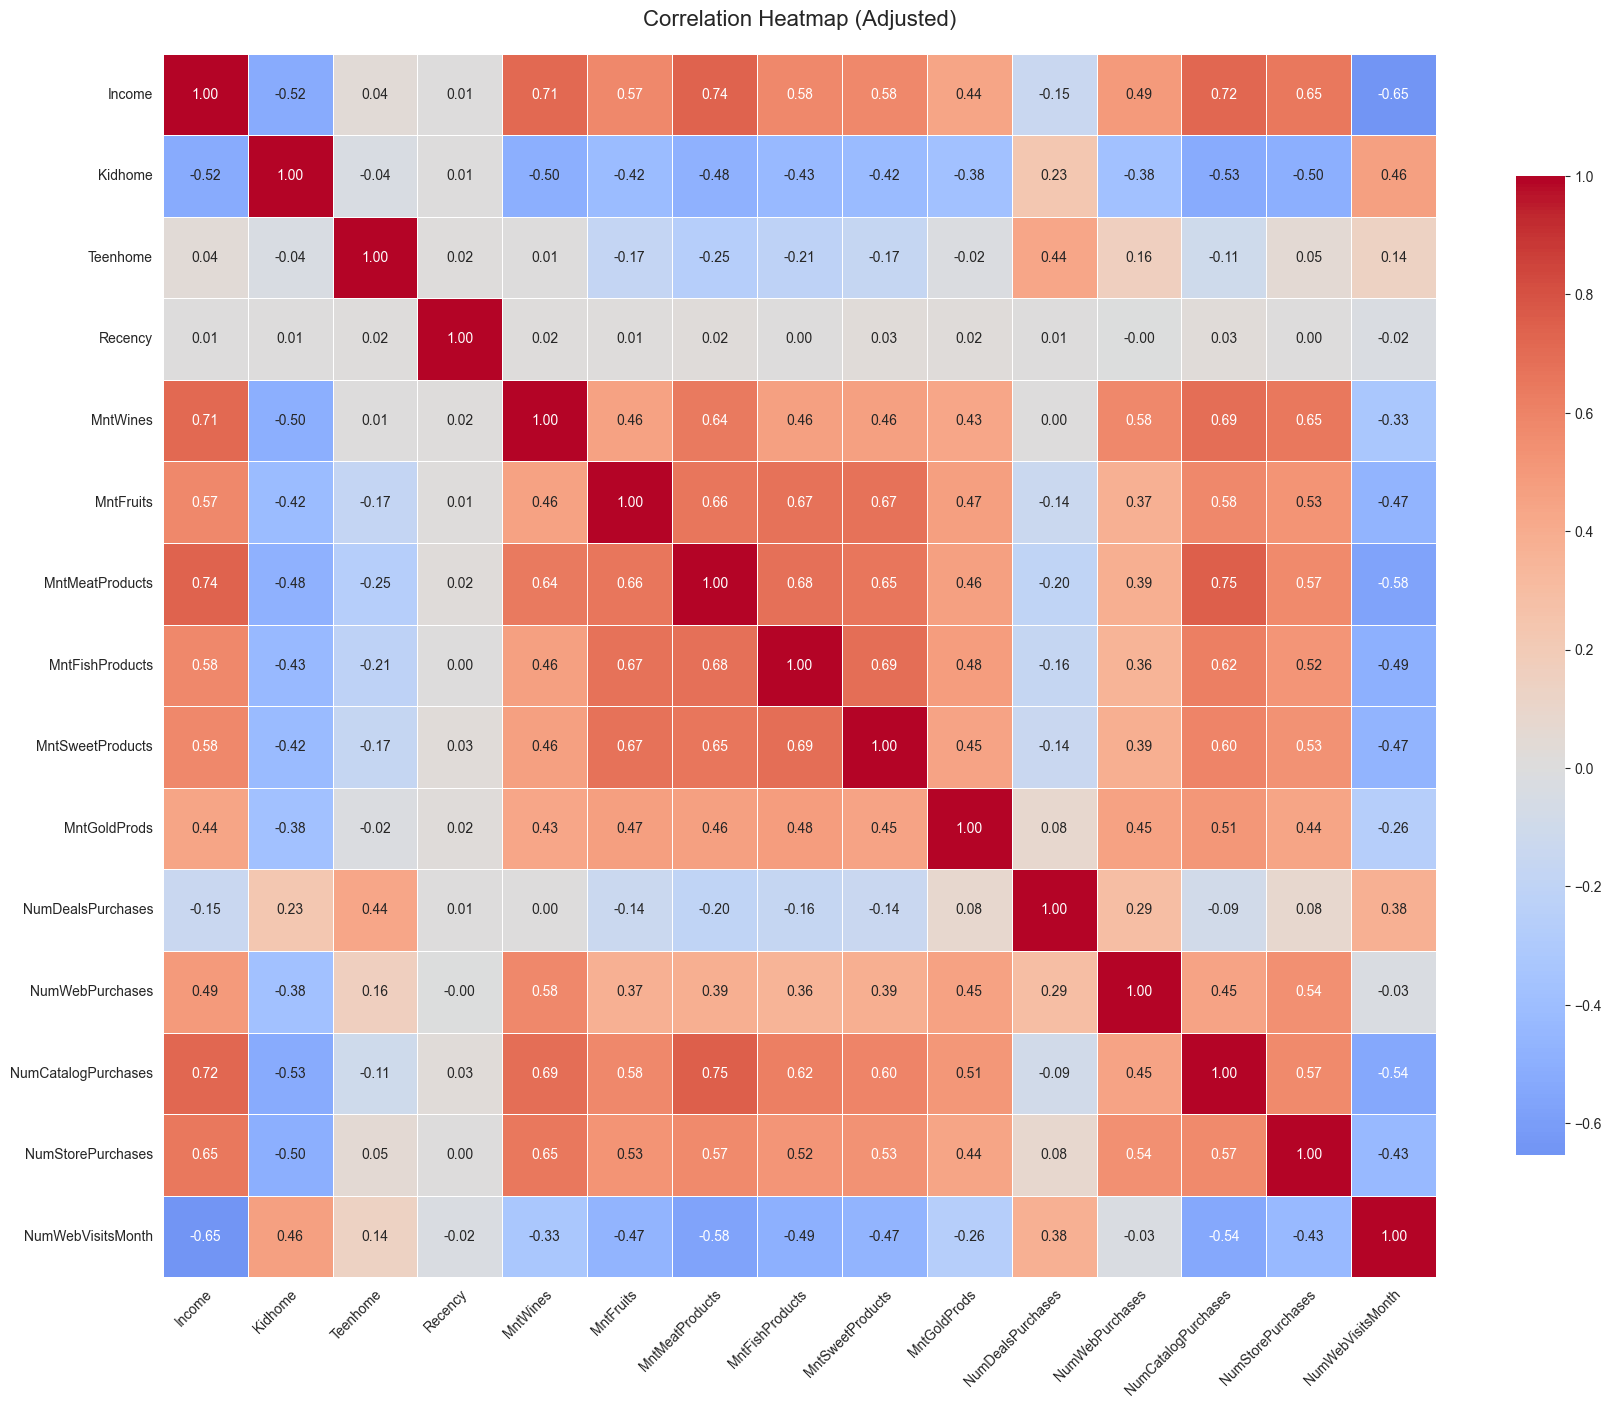

In [14]:

# Select numerical columns (exclude IDs/constants)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_drop = ['ID','Year_Birth','Dt_Customer','Complain','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
numerical_cols = [col for col in numerical_cols if col not in cols_to_drop]

# Calculate correlations
corr_matrix = df[numerical_cols].corr()

# Set up the plot
plt.figure(figsize=(18, 14))  # Increased size for more columns

# Create heatmap with adjustments
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10}  # Smaller annotation font
)

# Rotate and align labels
plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor'
)
plt.yticks(rotation=0)

# Force tight layout and adjust margins
plt.tight_layout(pad=2.0)  # Extra padding
plt.title('Correlation Heatmap (Adjusted)', fontsize=16, pad=20)
plt.show()

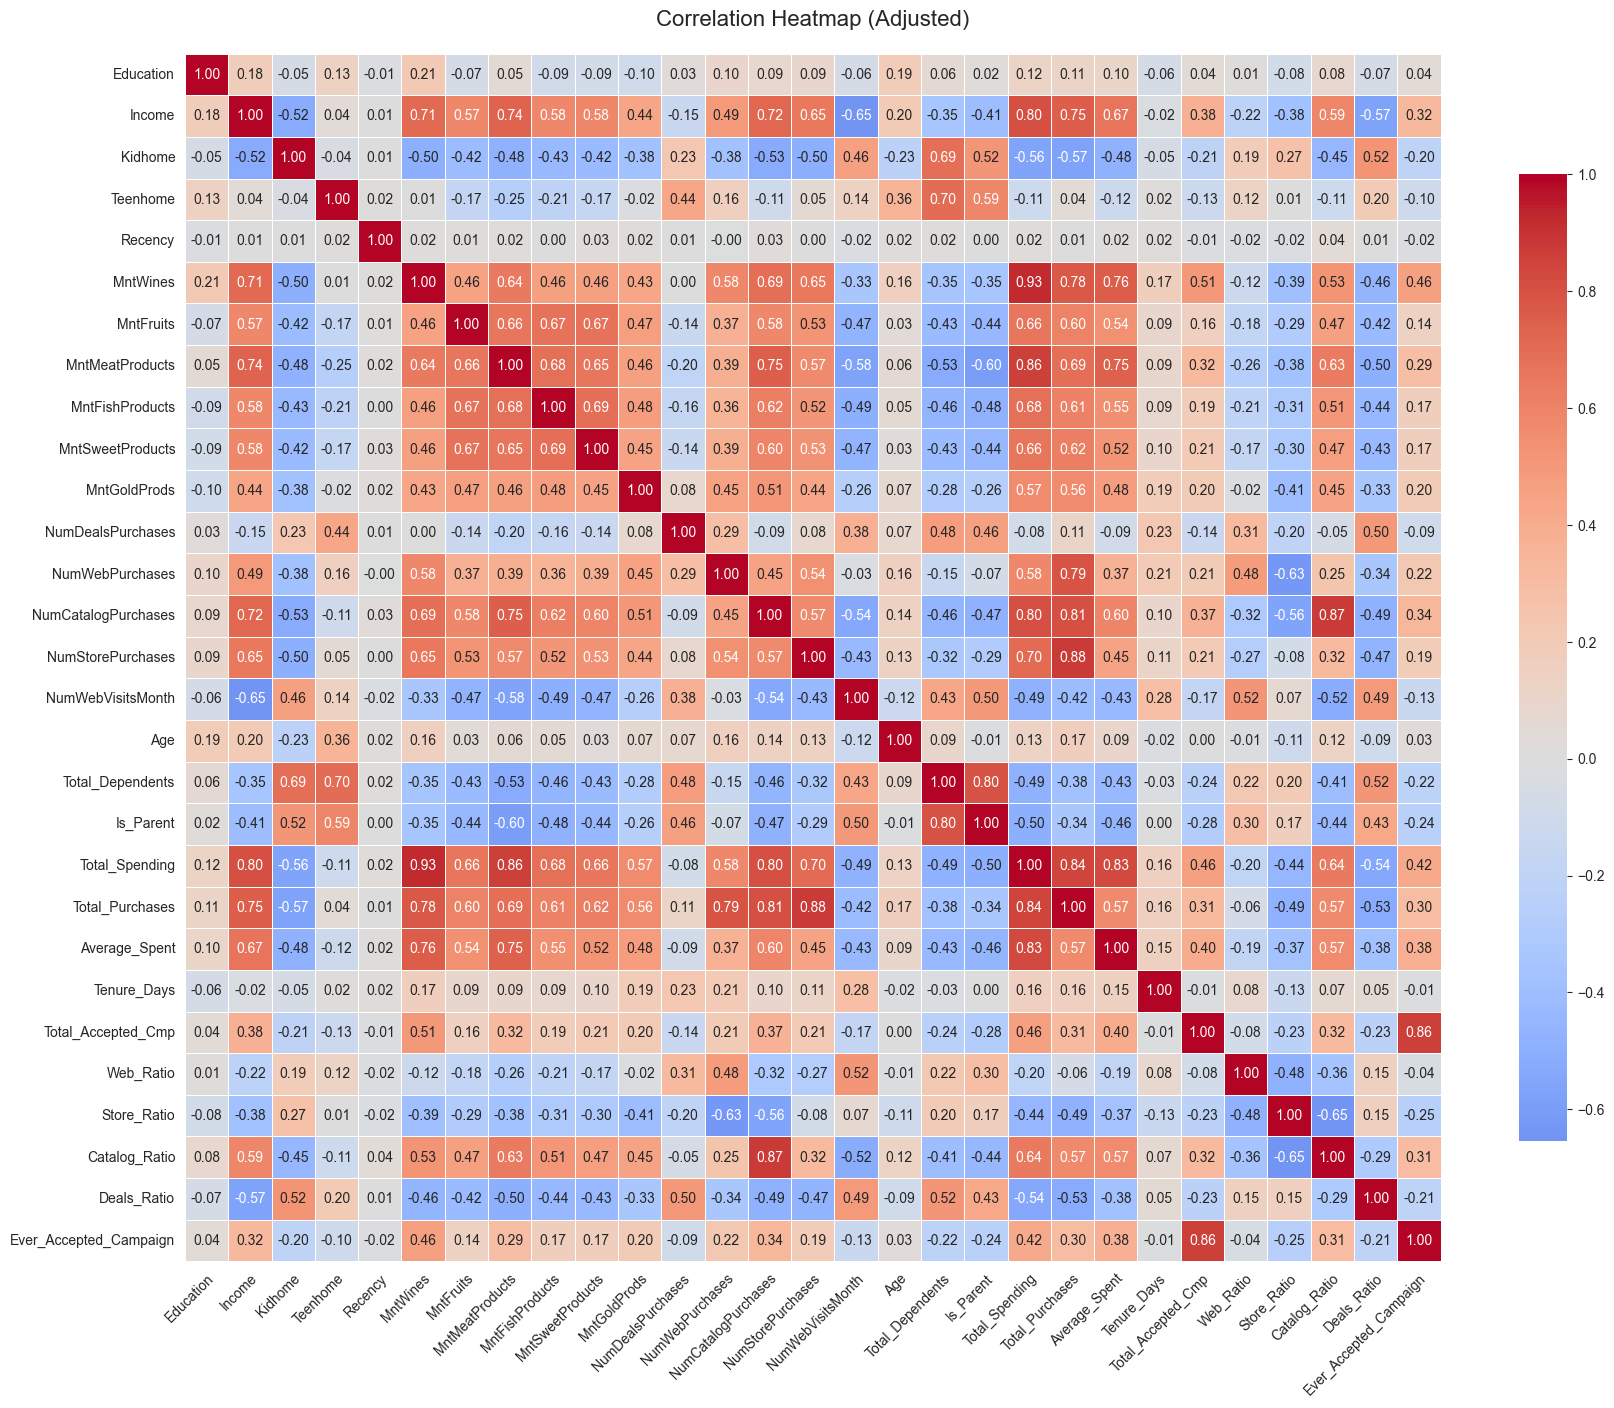

In [15]:


#this is the heatmap for the featured csv

# Load data
df = pd.read_csv('featured_customer_segmentation.csv')

# Select numerical columns (exclude IDs/constants)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Complain', 'Response', 'AcceptedCmp1', 'AcceptedCmp2',
                'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
numerical_cols = [col for col in numerical_cols if col not in cols_to_drop]

# Calculate correlations
corr_matrix = df[numerical_cols].corr()

# Set up the plot
plt.figure(figsize=(18, 14))  # Increased size for more columns

# Create heatmap with adjustments
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10}  # Smaller annotation font
)

# Rotate and align labels
plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor'
)
plt.yticks(rotation=0)

# Force tight layout and adjust margins
plt.tight_layout(pad=2.0)  # Extra padding
plt.title('Correlation Heatmap (Adjusted)', fontsize=16, pad=20)
plt.show()

